<a href="https://colab.research.google.com/github/arutraj/ML_Basics/blob/main/Neural_Network_from_scratch_using_NumPy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Steps to build a Neural Network in NumPy

<ol>1. Loading the dataset (Input and Output)</ol>
<ol>2. Architecture of the model (# input, hidden and output neurons)</ol>
<ol>3. Initializing the weights for all the layers</ol>
<ol>4. Implementing forward propagation</ol>
<ol>5. Implementing backward propagation</ol>
<ol>6. Train the model for n epochs </ol>

## 1. Loading the dataset (Input and Output)

In [1]:
# importing required libraries
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# version of numpy library
print('Version of numpy:',np.__version__)

Version of numpy: 1.25.2


In [3]:
# version of matplotlib library
print('Version of matplotlib:',matplotlib.__version__)

Version of matplotlib: 3.7.1


In [4]:
# creating the input array
X=np.array([[1,0,1,0], [1,0,1,1], [0,1,0,1]])
print ('\n Input:')
print(X)
# shape of input array
print('\n Shape of Input:', X.shape)


 Input:
[[1 0 1 0]
 [1 0 1 1]
 [0 1 0 1]]

 Shape of Input: (3, 4)


In [5]:
# converting the input in matrix form 4 feature x 3 observations
X = X.T
print('\n Input in matrix form:')
print(X)
# shape of input matrix
print('\n Shape of Input Matrix:', X.shape)


 Input in matrix form:
[[1 1 0]
 [0 0 1]
 [1 1 0]
 [0 1 1]]

 Shape of Input Matrix: (4, 3)


In [6]:
# creating the output array
y=np.array([[1],[1],[0]])
print ('\n Actual Output:')
print(y)

# output in matrix form
y = y.T

print ('\n Output in matrix form:')
print(y)

# shape of input array
print('\n Shape of Output:', y.shape)


 Actual Output:
[[1]
 [1]
 [0]]

 Output in matrix form:
[[1 1 0]]

 Shape of Output: (1, 3)


## 2. Architecture of the model (# input, hidden and output neurons)

In [7]:
inputlayer_neurons = X.shape[0] # number of features in data set
hiddenlayer_neurons = 3 # number of hidden layers neurons
output_neurons = 1 # number of neurons at output layer

![alt text](https://drive.google.com/uc?id=1zrEFVsc6bMQZ7fRxbK4DRceaG78k26Pc)

## 3. Initializing the weights for all the layers

NOTE: For simplicity, we are assuming that the bias for all the layers is 0

In [8]:
# initializing weight
# Shape of w_ih should number of neurons at input layer X number of neurons at hidden layer
w_ih=np.random.uniform(size=(inputlayer_neurons,hiddenlayer_neurons))


# Shape of w_ho should number of neurons at hidden layer X number of neurons at output layer
w_ho=np.random.uniform(size=(hiddenlayer_neurons,output_neurons))

In [9]:
# shape of weight matrix
w_ih.shape, w_ho.shape

((4, 3), (3, 1))

## 4. Implementing forward propagation

![alt text](https://drive.google.com/uc?id=1YwD7vY9k84vZmjmE5CXgQ69fYyadPsox)

In [10]:
# We are using sigmoid as an activation function so defining the sigmoid function here

# defining the Sigmoid Function
def sigmoid (x):
    return 1/(1 + np.exp(-x))

In [11]:
# hidden layer activations

hidden_layer_input=np.dot(w_ih.T,X)
hiddenlayer_activations = sigmoid(hidden_layer_input)

![alt text](https://drive.google.com/uc?id=1ETMoLD1fwi5u1HHLqtAdVUs-P8HNOU_p)

In [12]:
# calculating the output
output_layer_input=np.dot(w_ho.T,hiddenlayer_activations)
output = sigmoid(output_layer_input)

In [13]:
# output
output

array([[0.73327181, 0.75234417, 0.70069509]])

## 5. Implementing backward propagation

![alt text](https://drive.google.com/uc?id=1uYdg4mQL-B9o7BTOLnfoYUhh_LxTnpcW)

In [14]:
# calculating error
error = np.square(y-output)/2

### Rate of change of error w.r.t weight between hidden and output layer

![alt text](https://drive.google.com/uc?id=1_KexjgVJGRptZ6t1eobTter3mfIGo9rs)

**a. Rate of change of error w.r.t output**

**b. Rate of change of output w.r.t Z2**

**c. Rate of change of Z2 w.r.t weights between hidden and output layer**

In [15]:
# rate of change of error w.r.t. output
error_wrt_output = -(y-output)

In [16]:
# rate of change of output w.r.t. Z2
output_wrt_Z2 = np.multiply(output,(1-output))

In [17]:
# rate of change of Z2 w.r.t. weights between hidden and output layer
Z2_wrt_who = hiddenlayer_activations

In [18]:
# checking the shapes of partial derivatives
error_wrt_output.shape, output_wrt_Z2.shape, Z2_wrt_who.shape

((1, 3), (1, 3), (3, 3))

In [19]:
# shape of weights of output layer
w_ho.shape

(3, 1)

![alt text](https://drive.google.com/uc?id=1VesmZOVpfgLFESvOFd7dE-YHNtSMMkvM)

In [21]:
# rate of change of error w.r.t weight between hidden and output layer
error_wrt_who = np.dot(Z2_wrt_who,(error_wrt_output*output_wrt_Z2).T)

In [22]:
error_wrt_who.shape

(3, 1)

### Rate of change of error w.r.t weight between input and hidden layer

![alt text](https://drive.google.com/uc?id=1X4-iInwlv7ber3fwgtqHuHTuFRci-tMV)

**a. Rate of change of error w.r.t output**

**b. Rate of change of output w.r.t Z2**

**c. Rate of change of Z2 w.r.t hidden layer activations**

**d. Rate of change of hidden layer activations w.r.t Z1**

**e. Rate of change of Z1 w.r.t weights between input and hidden layer**

In [23]:
# rate of change of error w.r.t. output
error_wrt_output = -(y-output)

In [24]:
# rate of change of output w.r.t. Z2
output_wrt_Z2 = np.multiply(output,(1-output))

In [25]:
# rate of change of Z2 w.r.t. hidden layer activations
Z2_wrt_h1 = w_ho

In [26]:
# rate of change of hidden layer activations w.r.t. Z1
h1_wrt_Z1 = np.multiply(hiddenlayer_activations,(1-hiddenlayer_activations))

In [27]:
# rate of change of Z1 w.r.t. weights between input and hidden layer
Z1_wrt_wih = X

In [28]:
# checking the shapes of partial derivatives
error_wrt_output.shape, output_wrt_Z2.shape, Z2_wrt_h1.shape, h1_wrt_Z1.shape, Z1_wrt_wih.shape

((1, 3), (1, 3), (3, 1), (3, 3), (4, 3))

In [29]:
# shape of weights of hidden layer
w_ih.shape

(4, 3)

![alt text](https://drive.google.com/uc?id=1RkG5x1NEFWlF3tj0OlswOWvBcV5XNV1C)

In [30]:
# rate of change of error w.r.t weights between input and hidden layer
error_wrt_wih = np.dot(Z1_wrt_wih,(h1_wrt_Z1*np.dot(Z2_wrt_h1,(output_wrt_Z2*error_wrt_output))).T)

In [31]:
error_wrt_wih.shape

(4, 3)

### Update the parameters

![alt text](https://drive.google.com/uc?id=1A5jaB3WjZx9yrJkk9imVEvP3PZodjapE)

In [32]:
# defining the learning rate
lr = 0.01

In [33]:
# initial w_ho and w_ih
w_ho

array([[0.1716807 ],
       [0.63894672],
       [0.52217245]])

In [34]:
w_ih

array([[0.11003693, 0.43127913, 0.01079581],
       [0.04361686, 0.21331758, 0.02824524],
       [0.76587773, 0.96325314, 0.95391816],
       [0.77918108, 0.16277994, 0.70266894]])

In [35]:
# updating the weights of output layer
w_ho = w_ho - lr * error_wrt_who

In [36]:
# updating the weights of hidden layer
w_ih = w_ih - lr * error_wrt_wih

In [37]:
# updated w_ho and w_ih
w_ho

array([[0.17141534],
       [0.63887456],
       [0.52194643]])

In [38]:
w_ih

array([[0.11006619, 0.43137458, 0.01088241],
       [0.04356336, 0.21309096, 0.02807691],
       [0.76590699, 0.96334859, 0.95400477],
       [0.77913826, 0.1625957 , 0.70253279]])

## 6. Training the model for n epochs

In [48]:
# defining the model architecture
inputlayer_neurons = X.shape[0] # number of features in data set
hiddenlayer_neurons = 3 # number of hidden layers neurons
output_neurons = 1 # number of neurons at output layer

# initializing weight
w_ih=np.random.uniform(size=(inputlayer_neurons,hiddenlayer_neurons))
w_ho=np.random.uniform(size=(hiddenlayer_neurons,output_neurons))

# defining the parameters
lr = 0.01
epochs = 100000

In [49]:
# initial w_ih and w_ho
w_ih

array([[0.57378166, 0.31835247, 0.56381865],
       [0.36260871, 0.34939455, 0.5008974 ],
       [0.97216828, 0.39518839, 0.12096917],
       [0.87899552, 0.55150926, 0.17838841]])

In [50]:
w_ho

array([[0.91977666],
       [0.38057828],
       [0.43003808]])

In [51]:
error_epoch = []
for i in range(epochs):
    # Forward Propogation

    # hidden layer activations
    hidden_layer_input=np.dot(w_ih.T,X)
    hiddenlayer_activations = sigmoid(hidden_layer_input)
    # calculating the output
    output_layer_input=np.dot(w_ho.T,hiddenlayer_activations)
    output = sigmoid(output_layer_input)


    # Backward Propagation

    # calculating error
    error = np.square(y-output)/2
    error_wrt_output = -(y-output)
    output_wrt_Z2 = np.multiply(output,(1-output))
    Z2_wrt_who = hiddenlayer_activations
    # rate of change of error w.r.t weight between hidden and output layer
    error_wrt_who = np.dot(Z2_wrt_who,(error_wrt_output*output_wrt_Z2).T)
    Z2_wrt_h1 = w_ho
    h1_wrt_Z1 = np.multiply(hiddenlayer_activations,(1-hiddenlayer_activations))
    Z1_wrt_wih = X
    # rate of change of error w.r.t weights between input and hidden layer
    error_wrt_wih = np.dot(Z1_wrt_wih,(h1_wrt_Z1*np.dot(Z2_wrt_h1,(error_wrt_output*output_wrt_Z2))).T)

    # updating the weights between hidden and output layer
    w_ho = w_ho - lr * error_wrt_who
    # updating the weights between input and hidden layer
    w_ih = w_ih - lr * error_wrt_wih

    # appending the error of each epoch
    error_epoch.append(np.average(error))

In [52]:
# updated w_ih and w_ho
w_ih

array([[ 1.84721061, -1.23491588,  0.38437853],
       [-2.36221645,  1.63937035,  0.7399711 ],
       [ 2.24559723, -1.15807996, -0.05847095],
       [-0.99575782,  0.73793106,  0.25983806]])

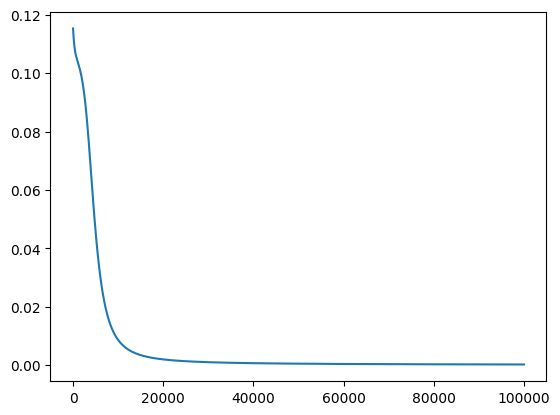

In [53]:
# visualizing the error after each epoch
plt.plot(np.arange(1,epochs+1), np.array(error_epoch))

In [54]:
# final output from the model
output

array([[0.98751919, 0.98035792, 0.02549695]])

In [55]:
# actual target
y

array([[1, 1, 0]])

In [56]:
# error at last epoch
error

array([[7.78853486e-05, 1.92905637e-04, 3.25047241e-04]])